In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = xr.open_dataset('20040306010712-REMSS-L2P_GHRSST-SSTsubskin-AMSRE-l2b_v07a_r09784.dat-v02.0-fv01.0.nc')
a

<xarray.Dataset>
Dimensions:                  (nj: 4192, ni: 243, time: 1)
Coordinates:
    lat                      (nj, ni) float32 ...
    lon                      (nj, ni) float32 ...
  * time                     (time) datetime64[ns] 2004-03-06T01:07:01
Dimensions without coordinates: nj, ni
Data variables: (12/13)
    sea_surface_temperature  (time, nj, ni) float32 ...
    sst_dtime                (time, nj, ni) float32 ...
    dt_analysis              (time, nj, ni) float32 ...
    sses_bias                (time, nj, ni) float32 ...
    sses_standard_deviation  (time, nj, ni) float32 ...
    l2p_flags                (time, nj, ni) int16 ...
    ...                       ...
    wind_speed               (time, nj, ni) float32 ...
    diurnal_amplitude        (time, nj, ni) float32 ...
    cool_skin                (time, nj, ni) float32 ...
    water_vapor              (time, nj, ni) float32 ...
    cloud_liquid_water       (time, nj, ni) float32 ...
    rain_rate                (time, nj, ni) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.6, Unidata Observation Dataset v1.0
    title:                      Sea Surface Temperature from AMSRE onboard AQ...
    summary:                    Sea Surface Temperature from AMSRE onboard AQ...
    references:                 MW SSES Report version 3.0
    institution:                REMSS
    history:                    created with sat_orbital_l2p processing
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L2P
    cdm_data_type:              swath

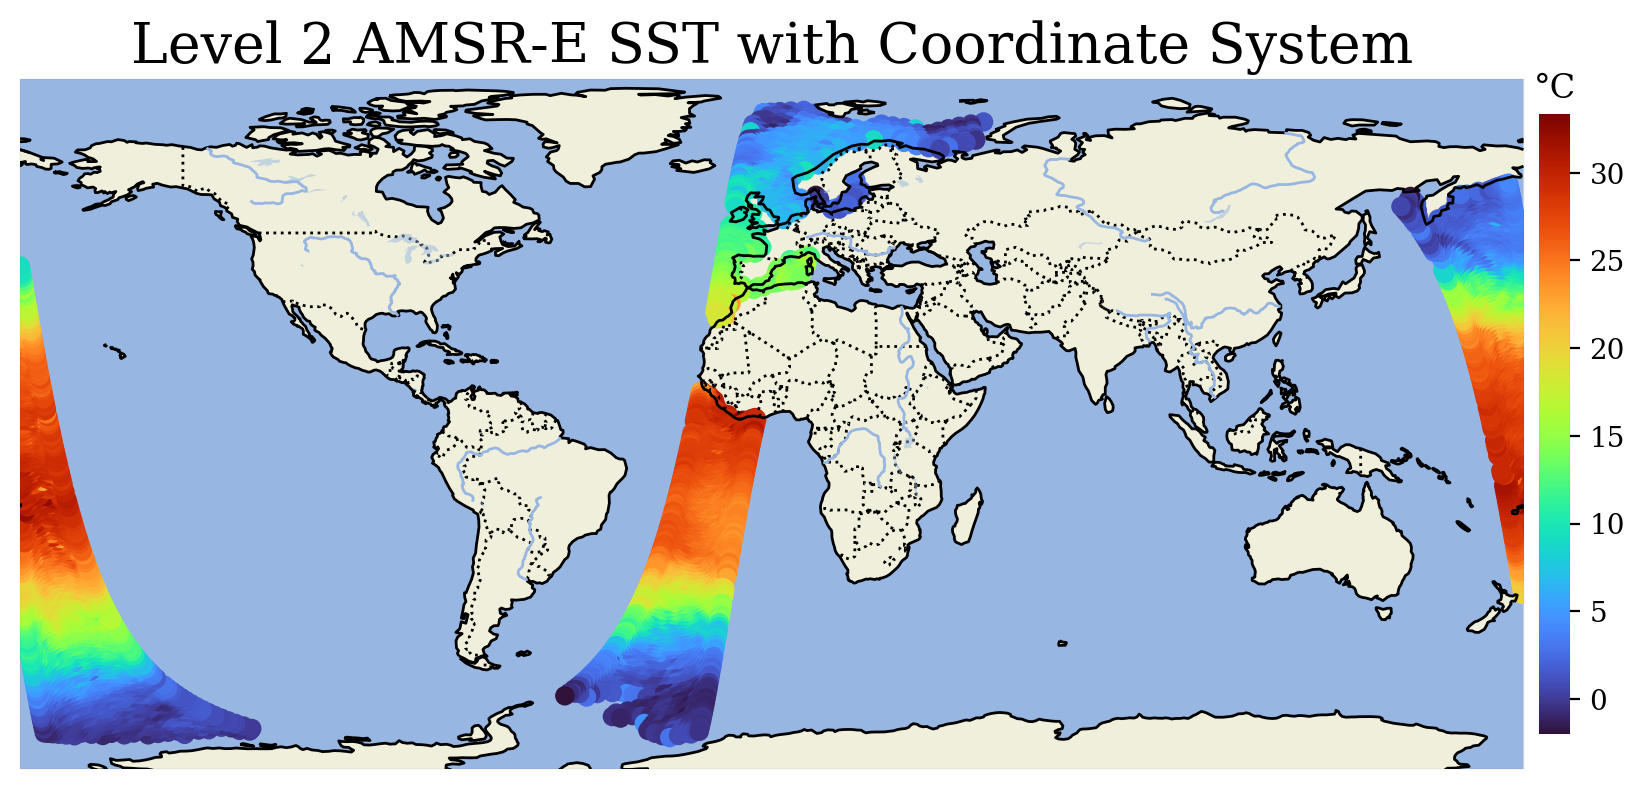

In [141]:
#cartopy coordinate reference system
import cartopy.crs as ccrs
import cartopy.feature

#changes typeface
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 200


fig = plt.figure(figsize=(10,10)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with

# make the map global rather than have it zoom in to
# the extents of any plotted data
# ax.set_extent([0, 90, 0, 50])
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
# ax.add_geometries(sa.geometry,crs=ccrs.epsg(32638),color='#2ca02c') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color

plt.scatter(a.lon[::10,::10],a.lat[::10,::10],c=a.sea_surface_temperature[0][::10,::10]-273.15,transform=ccrs.PlateCarree(),cmap='turbo')
cbr = plt.colorbar(fraction=.02,pad=.01,orientation='vertical')
cbr.ax.set_title('°C');
plt.title('Level 2 AMSR-E SST with Coordinate System',fontsize=20)
plt.savefig('amsre_withcoords.png',bbox_inches='tight')

# colorado = mpatches.Patch(color='#d62728', label='Colorado') #creates legend item, specifies color
# plt.savefig('mid__east__transbo.png',bbox_inches='tight')
# ax.legend(handles=[bearriver],loc='lower left',fontsize=20) # creates legend
# plt.savefig('gldas__clip/mid_east_rioclip__01012014_carto.png',bbox_inches='tight') ## saves figure
plt.show() ## plots figure


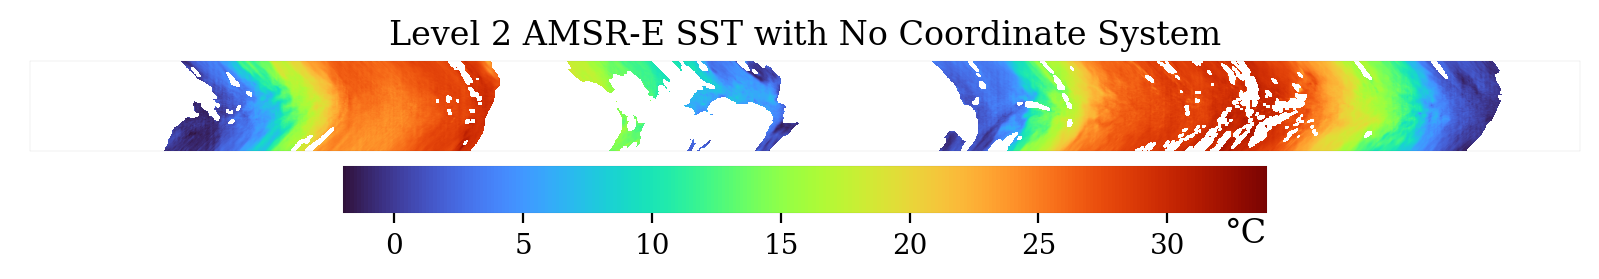

In [215]:
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 200

plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.imshow(np.rot90(a.sea_surface_temperature[0],3)-273.15, cmap='turbo')
plt.title('Level 2 AMSR-E SST with No Coordinate System')
plt.xticks([])
plt.yticks([])
cbr = plt.colorbar(fraction=.03,pad=.01,orientation='horizontal')
cbr.ax.set_title('°C',loc='right',y=-1);

plt.savefig('amsre_nocoords.png',bbox_inches='tight')

In [104]:
h = xr.open_dataset('20110102000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20110102v7-v02.0-fv01.0.nc')
h

<xarray.Dataset>
Dimensions:                  (time: 2, lat: 720, lon: 1440)
Coordinates:
  * time                     (time) datetime64[ns] 2011-01-02 2011-01-03
  * lat                      (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                      (lon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables: (12/17)
    sea_surface_temperature  (time, lat, lon) float32 ...
    sst_dtime                (time, lat, lon) float64 ...
    dt_analysis              (time, lat, lon) float32 ...
    sses_bias                (time, lat, lon) float32 ...
    sses_standard_deviation  (time, lat, lon) float32 ...
    diurnal_amplitude        (time, lat, lon) float32 ...
    ...                       ...
    sea_ice_fraction         (time, lat, lon) float32 ...
    l2p_flags                (time, lat, lon) int16 ...
    quality_level            (time, lat, lon) float32 ...
    rejection_flag           (time, lat, lon) int8 ...
    confidence_flag          (time, lat, lon) int8 ...
    proximity_confidence     (time, lat, lon) int8 ...
Attributes: (12/47)
    Conventions:                CF-1.6, Unidata Observation Dataset v1.0
    title:                      Sea Surface Temperature from AMSRE onboard Aq...
    summary:                    Sea Surface Temperature from AMSRE onboard Aq...
    comment:                    This research was supported by the NASA Physi...
    references:                 MW SSES Report version 3.0
    institution:                REMSS
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3U
    cdm_data_type:              grid

In [164]:
h.quality_level

<xarray.DataArray 'quality_level' (time: 2, lat: 720, lon: 1440)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]],

       [[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-02 2011-01-03
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    long_name:      quality level
    standard_name:  quality_level
    flag_meanings:  0_no_data 1_bad_near_ice_land_sunglint_RFI_edge-of-swath_...
    flag_values:    [0 1 2 3 4 5]
    comment:        This flag can help use the data
    valid_min:      0
    valid_max:      5

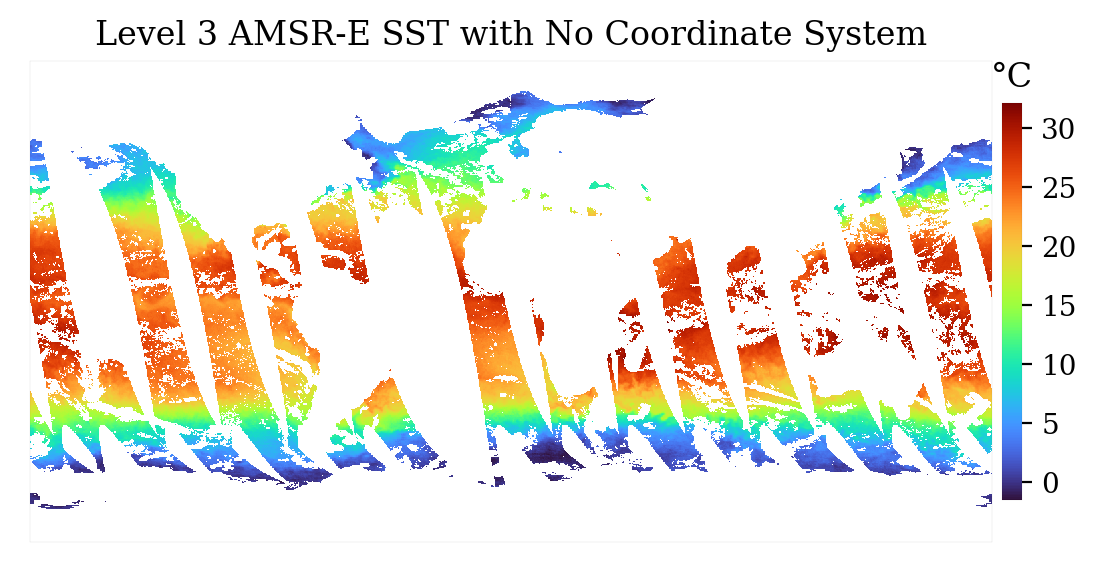

In [216]:
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 200

plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.pcolormesh(np.where(h.quality_level==5,h.sea_surface_temperature[0]-273.15,np.nan)[0],cmap='turbo')

cbr = plt.colorbar(fraction=.02,pad=.01,orientation='vertical')
cbr.ax.set_title('°C');
plt.title('Level 3 AMSR-E SST with No Coordinate System')
plt.savefig('amsre_l3_nocoords.png',bbox_inches='tight')

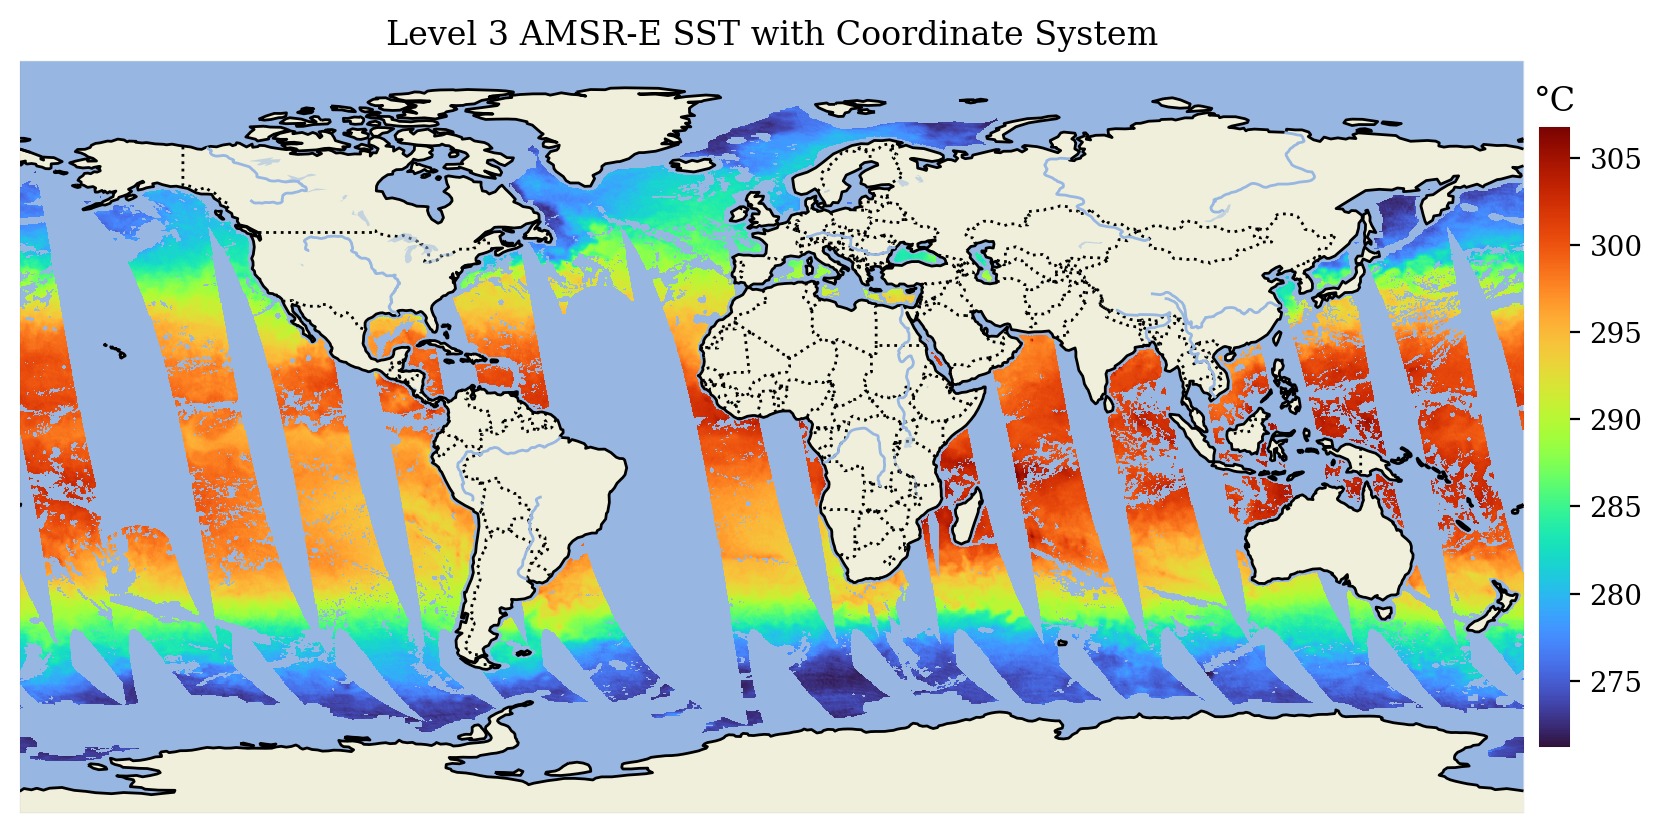

In [142]:
#cartopy coordinate reference system
import cartopy.crs as ccrs
import cartopy.feature

#changes typeface
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 200


fig = plt.figure(figsize=(10,10)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with

# make the map global rather than have it zoom in to
# the extents of any plotted data
# ax.set_extent([0, 90, 0, 50])
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
# ax.add_geometries(sa.geometry,crs=ccrs.epsg(32638),color='#2ca02c') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color

plt.pcolormesh(h.lon,h.lat,h.sea_surface_temperature[0],transform=ccrs.PlateCarree(),cmap='turbo')
cbr = plt.colorbar(fraction=.02,pad=.01,orientation='vertical')
cbr.ax.set_title('°C');
plt.title('Level 3 AMSR-E SST with Coordinate System')
plt.savefig('amsre_l3_coords.png',bbox_inches='tight')

In [182]:
x = xr.open_dataset('AQUA_MODIS.20170909.L3m.DAY.NSST.sst.4km.nc')
x

<xarray.Dataset>
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/59)
    product_name:                     AQUA_MODIS.20170909.L3m.DAY.NSST.sst.4k...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   day
    ...                               ...
    publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    data_bins:                        5693543
    data_minimum:                     -1.5024999
    data_maximum:                     35.72274

total modis pixels (day or night)	37324800
high quality pixels 			3758190
total amsre (day or night)		1036800
high quality pixels 			503201


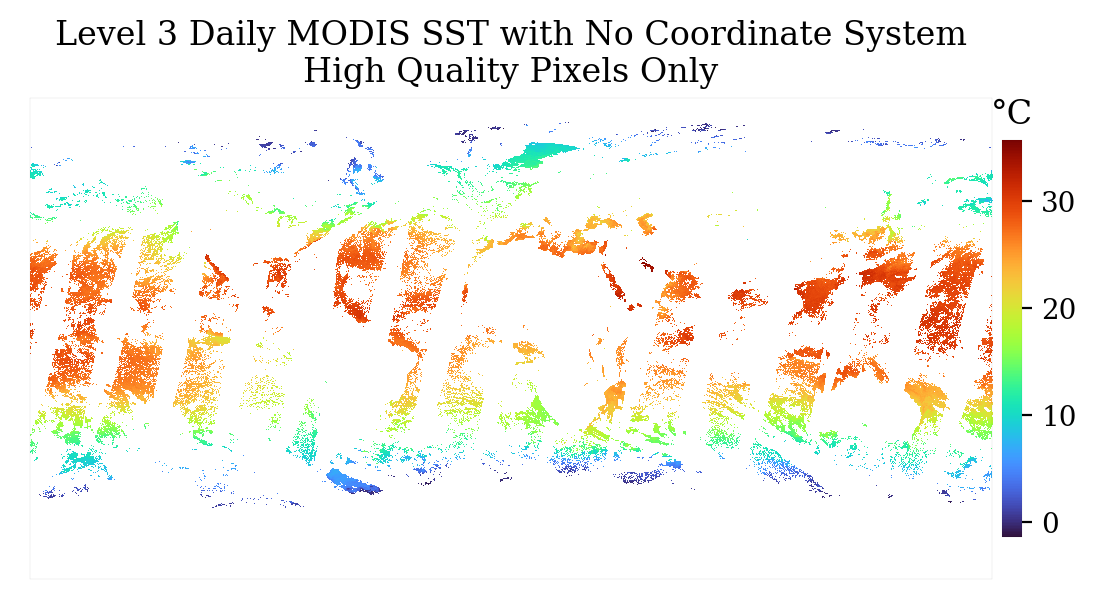

In [220]:
modis_sst = np.where(x.qual_sst==0,x.sst,np.nan)

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 200

plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.pcolormesh(modis_sst,cmap='turbo')

cbr = plt.colorbar(fraction=.02,pad=.01,orientation='vertical')
cbr.ax.set_title('°C');
plt.title('Level 3 Daily MODIS SST with No Coordinate System\nHigh Quality Pixels Only')

plt.imshow(x.sst,cmap='turbo')
plt.savefig('modis_day_highqual_l3.png',bbox_inches='tight')

In [144]:
l = xr.open_dataset('AQUA_MODIS.20110201_20110228.L3m.MO.NSST.sst.4km.nc')
l

<xarray.Dataset>
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/59)
    product_name:                     AQUA_MODIS.20110201_20110228.L3m.MO.NSS...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   month
    ...                               ...
    publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    data_bins:                        19129987
    data_minimum:                     -1.785
    data_maximum:                     33.04

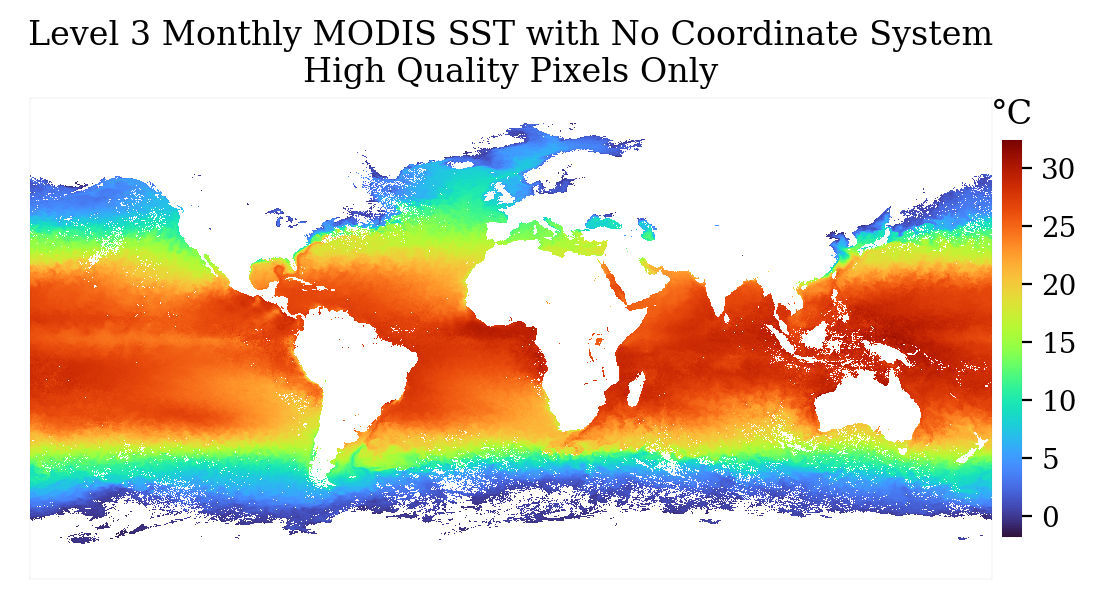

In [222]:
modis_sst = np.flipud(np.where(l.qual_sst==0,l.sst,np.nan))

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 200

plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.pcolormesh(modis_sst,cmap='turbo')

cbr = plt.colorbar(fraction=.02,pad=.01,orientation='vertical')
cbr.ax.set_title('°C');
plt.title('Level 3 Monthly MODIS SST with No Coordinate System\nHigh Quality Pixels Only')
plt.savefig('modis_l3__monthly_nocoords.png',bbox_inches='tight')

In [211]:
print(f'total modis pixels (day or night)\t{4320 * 8640}')
qual_count = np.where(np.float32(x.qual_sst)==0,1,0)
print(f'high quality pixels \t\t\t{np.sum(qual_count)}')

print(f'total amsre (day or night)\t\t{720 * 1440}')
am_qual = np.where(h.quality_level==5,1,0)
print(f'high quality pixels \t\t\t{np.sum(am_qual)}')


print(f'total modis month (day or night)\t{4320 * 8640}')
qual_count = np.where(np.float32(l.qual_sst)==0,1,0)
print(f'high quality pixels \t\t\t{np.sum(qual_count)}')

total modis pixels (day or night)	37324800
high quality pixels 			3758190
total amsre (day or night)		1036800
high quality pixels 			503201
total modis month (day or night)	37324800
high quality pixels 			18682913


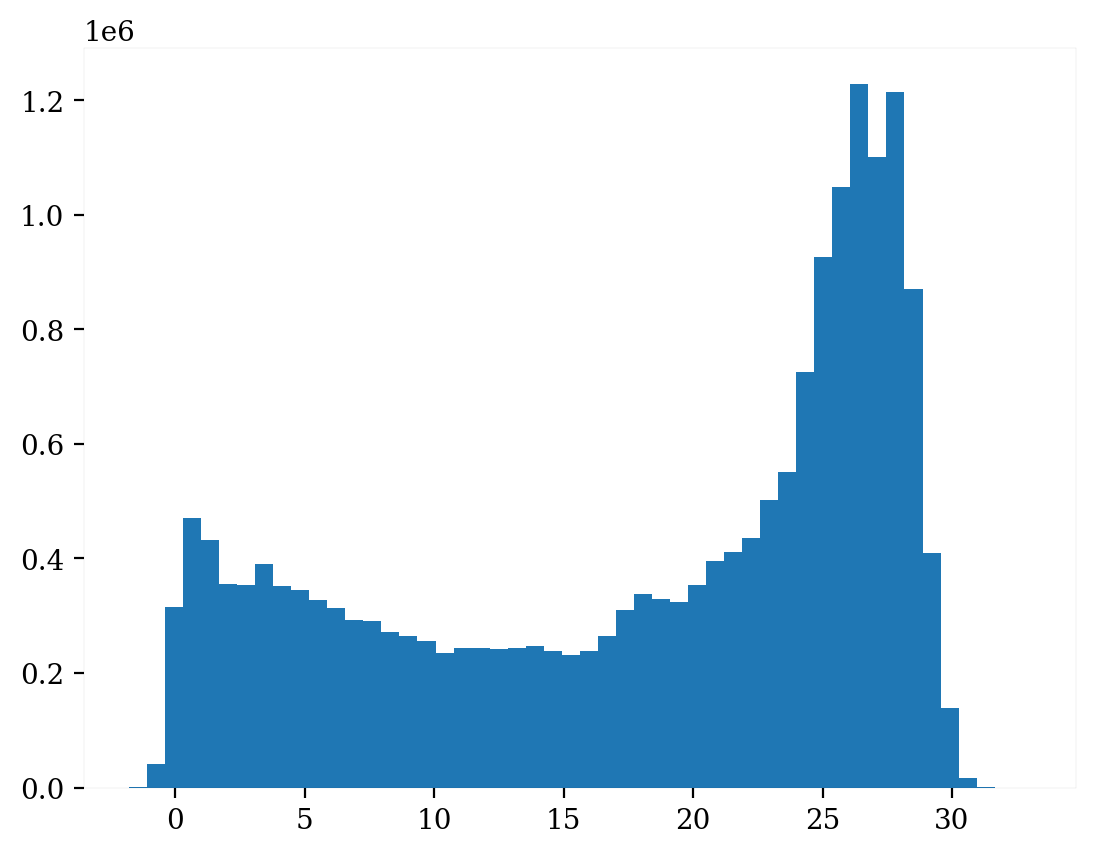

In [147]:

plt.hist(np.array(modis_sst).reshape(-1),bins=50);

In [92]:
from PIL import Image

In [95]:
m = np.asarray(l.sst)
m.shape

(4320, 8640)

In [97]:
im.width

8640

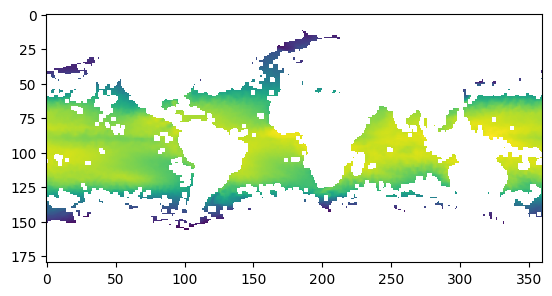

In [117]:
im = Image.fromarray(m)
small_im = im.resize((im.width//24,im.height//24),resample=Image.Resampling.BILINEAR)
sml_im = np.asarray(small_im)
sml_im.shape

plt.imshow(sml_im)

In [223]:
# import requests
# def download_file(url):
#     local_filename = url.split('/')[-1]
#     # NOTE the stream=True parameter below
#     with requests.get(url, stream=True) as r:
#         r.raise_for_status()
#         with open(f'{local_filename}', 'wb') as f:
#             for chunk in r.iter_content(chunk_size=8192): 
#                 # If you have chunk encoded response uncomment if
#                 # and set chunk_size parameter to None.
#                 #if chunk: 
#                 f.write(chunk)
#     return local_filename

# download_file('https://www.seanoe.org/data/00412/52367/data/86442.tar.gz')

In [ ]:
import tarfile
# open file
file = tarfile.open('dl_argo/86442.tar.gz')
# extracting file
file.extractall('./Destination_FolderName')
file.close()

In [1]:
import glob
import shutil

In [21]:
# x = glob.glob('argo/field/*/*')
# len(x)

# x = [i for i in x if i[-7:-3] != 'TEMP']
# # x[0]
# import os
# for i in x:
#     print(i)
#     os.remove(i)

In [17]:
x[0]

'argo/data/2002/ISAS20_ARGO_20020115_dat_PSAL.nc'

In [22]:
import xarray as xr

In [37]:
x = glob.glob('argo/field/*/*')
len(x)
x[0][16:]

for idx,i in enumerate(x):
    y = xr.open_dataset(i)
    z = y.isel(depth=0)
    z.to_netcdf(f'argo_surfonly/{i[16:]}')
    print(f'{idx}\t{i}')
    

0	argo/field/2002/ISAS20_ARGO_20020115_fld_TEMP.nc
1	argo/field/2002/ISAS20_ARGO_20020215_fld_TEMP.nc
2	argo/field/2002/ISAS20_ARGO_20020315_fld_TEMP.nc
3	argo/field/2002/ISAS20_ARGO_20020415_fld_TEMP.nc
4	argo/field/2002/ISAS20_ARGO_20020515_fld_TEMP.nc
5	argo/field/2002/ISAS20_ARGO_20020615_fld_TEMP.nc
6	argo/field/2002/ISAS20_ARGO_20020715_fld_TEMP.nc
7	argo/field/2002/ISAS20_ARGO_20020815_fld_TEMP.nc
8	argo/field/2002/ISAS20_ARGO_20020915_fld_TEMP.nc
9	argo/field/2002/ISAS20_ARGO_20021015_fld_TEMP.nc
10	argo/field/2002/ISAS20_ARGO_20021115_fld_TEMP.nc
11	argo/field/2002/ISAS20_ARGO_20021215_fld_TEMP.nc
12	argo/field/2003/ISAS20_ARGO_20030115_fld_TEMP.nc
13	argo/field/2003/ISAS20_ARGO_20030215_fld_TEMP.nc
14	argo/field/2003/ISAS20_ARGO_20030315_fld_TEMP.nc
15	argo/field/2003/ISAS20_ARGO_20030415_fld_TEMP.nc
16	argo/field/2003/ISAS20_ARGO_20030515_fld_TEMP.nc
17	argo/field/2003/ISAS20_ARGO_20030615_fld_TEMP.nc
18	argo/field/2003/ISAS20_ARGO_20030715_fld_TEMP.nc
19	argo/field/2003/ISA

In [23]:
x = xr.open_dataset('argo/field/2020/ISAS20_ARGO_20200115_fld_TEMP.nc')
x

<xarray.Dataset>
Dimensions:      (longitude: 720, latitude: 545, depth: 187, time: 1)
Coordinates:
  * longitude    (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude     (latitude) float32 -77.01 -76.9 -76.78 ... 89.49 89.69 89.9
  * depth        (depth) float32 1.0 3.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time         (time) datetime64[ns] 2020-01-15
Data variables:
    TEMP         (time, depth, latitude, longitude) float32 ...
    TEMP_ERR     (time, depth, latitude, longitude) float32 ...
    TEMP_PCTVAR  (time, depth, latitude, longitude) float32 ...
Attributes: (12/20)
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20210706T155328L : Creation
    institution:            LOPS/IFREMER/IUEM
    project_name:           ISASLOPS
    analysis_name:          ISAS20_ARGO_
    ...                     ...
    start_date:             2020-01-15
    stop_date:              2020-01-15
    creation_date:          20210706T155328L
    reference_date:         1950-01-01T00:00:00Z
    references:             Gaillard et al., JCLIM 2016, Doi:10.1175/JCLI-D-1...
    comment:                V8.0 T and S fields

In [27]:
y = x.isel(depth=0)
y

<xarray.Dataset>
Dimensions:      (longitude: 720, latitude: 545, time: 1)
Coordinates:
  * longitude    (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude     (latitude) float32 -77.01 -76.9 -76.78 ... 89.49 89.69 89.9
    depth        float32 1.0
  * time         (time) datetime64[ns] 2020-01-15
Data variables:
    TEMP         (time, latitude, longitude) float32 ...
    TEMP_ERR     (time, latitude, longitude) float32 ...
    TEMP_PCTVAR  (time, latitude, longitude) float32 ...
Attributes: (12/20)
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20210706T155328L : Creation
    institution:            LOPS/IFREMER/IUEM
    project_name:           ISASLOPS
    analysis_name:          ISAS20_ARGO_
    ...                     ...
    start_date:             2020-01-15
    stop_date:              2020-01-15
    creation_date:          20210706T155328L
    reference_date:         1950-01-01T00:00:00Z
    references:             Gaillard et al., JCLIM 2016, Doi:10.1175/JCLI-D-1...
    comment:                V8.0 T and S fields

In [148]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob

In [132]:
argo = xr.open_dataset('../aqua/data/argo_surfonly/ISAS20_ARGO_20100115_fld_TEMP.nc')
argo

<xarray.Dataset>
Dimensions:      (longitude: 720, latitude: 545, time: 1)
Coordinates:
  * longitude    (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude     (latitude) float32 -77.01 -76.9 -76.78 ... 89.49 89.69 89.9
    depth        float32 ...
  * time         (time) datetime64[ns] 2010-01-15
Data variables:
    TEMP         (time, latitude, longitude) float32 ...
    TEMP_ERR     (time, latitude, longitude) float32 ...
    TEMP_PCTVAR  (time, latitude, longitude) float32 ...
Attributes: (12/20)
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20210706T131544L : Creation
    institution:            LOPS/IFREMER/IUEM
    project_name:           ISASLOPS
    analysis_name:          ISAS20_ARGO_
    ...                     ...
    start_date:             2010-01-15
    stop_date:              2010-01-15
    creation_date:          20210706T131544L
    reference_date:         1950-01-01T00:00:00Z
    references:             Gaillard et al., JCLIM 2016, Doi:10.1175/JCLI-D-1...
    comment:                V8.0 T and S fields

In [150]:
argo_2010 = glob.glob('../aqua/data/argo_surfonly/ISAS20_ARGO_2010*.nc')
for i in argo_2010:
    print(i)

../aqua/data/argo_surfonly/ISAS20_ARGO_20100115_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20100215_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20100315_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20100415_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20100515_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20100615_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20100715_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20100815_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20100915_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20101015_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20101115_fld_TEMP.nc
../aqua/data/argo_surfonly/ISAS20_ARGO_20101215_fld_TEMP.nc


In [164]:
argo_2010[0][39:45]

'201001'

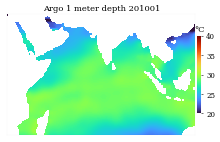

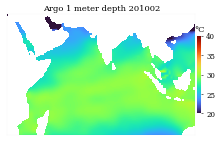

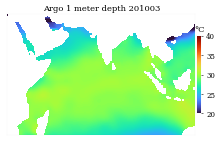

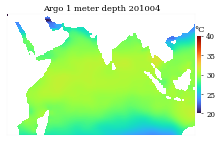

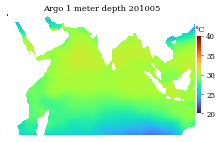

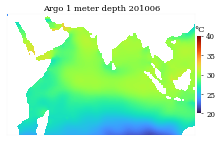

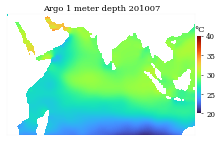

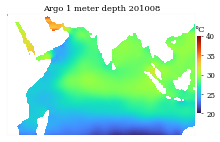

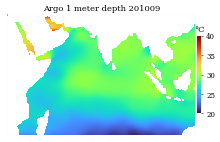

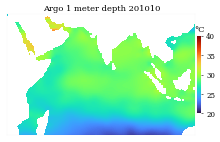

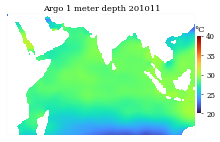

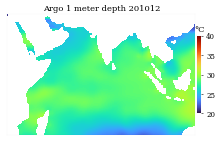

In [166]:
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 50

argo_2010 = glob.glob('../aqua/data/argo_surfonly/ISAS20_ARGO_2010*.nc')

for i in argo_2010:
    j = xr.open_dataset(i)
    plt.figure(figsize=(5,5))
    plt.gca().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.flipud(j.TEMP[0][200:315,420:600]),cmap='turbo',vmin=20,vmax=40)
    cbr = plt.colorbar(fraction=.02,pad=.01,orientation='vertical')
    cbr.ax.set_title('°C');
    plt.title(f'Argo 1 meter depth {i[39:45]}')

In [1]:
pwd

'/work/albertl_uri_edu/aqua/code'

In [16]:
import glob
import xarray as xr
x = glob.glob('../data/amsre/*/*/*.nc')

In [14]:
x = sorted(x)
y = [x[23:29] for x in x]

In [17]:
y[1]

'200206'

In [18]:
z = xr.open_dataset(x[0])
z

<xarray.Dataset>
Dimensions:                  (time: 2, lat: 720, lon: 1440)
Coordinates:
  * time                     (time) datetime64[ns] 2002-06-01T16:12:00 2002-0...
  * lat                      (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                      (lon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables: (12/17)
    sea_surface_temperature  (time, lat, lon) float32 ...
    sst_dtime                (time, lat, lon) float64 ...
    dt_analysis              (time, lat, lon) float32 ...
    sses_bias                (time, lat, lon) float32 ...
    sses_standard_deviation  (time, lat, lon) float32 ...
    diurnal_amplitude        (time, lat, lon) float32 ...
    ...                       ...
    sea_ice_fraction         (time, lat, lon) float32 ...
    l2p_flags                (time, lat, lon) int16 ...
    quality_level            (time, lat, lon) float32 ...
    rejection_flag           (time, lat, lon) int8 ...
    confidence_flag          (time, lat, lon) int8 ...
    proximity_confidence     (time, lat, lon) int8 ...
Attributes: (12/47)
    Conventions:                CF-1.6, Unidata Observation Dataset v1.0
    title:                      Sea Surface Temperature from AMSRE onboard Aq...
    summary:                    Sea Surface Temperature from AMSRE onboard Aq...
    comment:                    This research was supported by the NASA Physi...
    references:                 MW SSES Report version 3.0
    institution:                REMSS
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3U
    cdm_data_type:              grid

In [27]:
len(y)

3384

In [34]:
a = sorted(list(set(y)))
a[0]

'200206'

In [37]:
import shutil
count = 0
interval = 10
for idx,i in enumerate(a):
    if (idx % interval == 0) & (idx != 0):
        count += interval
        print(f'{count} / {len(a)}')
    os.mkdir(f'../data/amsre/months/{i}')
    for j in x:
        if i == j[23:29]:
            shutil.move(j,f'../data/amsre/months/{i}')

10 / 113
20 / 113
30 / 113
40 / 113
50 / 113
60 / 113
70 / 113
80 / 113
90 / 113
100 / 113
110 / 113


In [39]:
A = glob.glob('../data/amsre/2*')
A

['../data/amsre/2002',
 '../data/amsre/2003',
 '../data/amsre/2004',
 '../data/amsre/2005',
 '../data/amsre/2006',
 '../data/amsre/2007',
 '../data/amsre/2008',
 '../data/amsre/2009',
 '../data/amsre/2010',
 '../data/amsre/2011']

In [40]:
for x in A:
    shutil.rmtree(x)

In [41]:
B = glob.glob('../data/amsre/months/200206/*')
B

['../data/amsre/months/200206/20020601000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020601v7-v02.0-fv01.0.nc',
 '../data/amsre/months/200206/20020602000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020602v7-v02.0-fv01.0.nc',
 '../data/amsre/months/200206/20020603000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020603v7-v02.0-fv01.0.nc',
 '../data/amsre/months/200206/20020604000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020604v7-v02.0-fv01.0.nc',
 '../data/amsre/months/200206/20020605000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020605v7-v02.0-fv01.0.nc',
 '../data/amsre/months/200206/20020606000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020606v7-v02.0-fv01.0.nc',
 '../data/amsre/months/200206/20020607000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020607v7-v02.0-fv01.0.nc',
 '../data/amsre/months/200206/20020608000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020608v7-v02.0-fv01.0.nc',
 '../data/amsre/months/200206/20020609000000-REMSS-L3U_GHRSST-SSTsubskin-AMSRE-f32_20020609v7-v02.0-fv01

In [78]:
c = xr.open_dataset(B[3])

In [79]:
c

<xarray.Dataset>
Dimensions:                  (time: 2, lat: 720, lon: 1440)
Coordinates:
  * time                     (time) datetime64[ns] 2002-06-04 2002-06-05
  * lat                      (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                      (lon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables: (12/17)
    sea_surface_temperature  (time, lat, lon) float32 ...
    sst_dtime                (time, lat, lon) float64 ...
    dt_analysis              (time, lat, lon) float32 ...
    sses_bias                (time, lat, lon) float32 ...
    sses_standard_deviation  (time, lat, lon) float32 ...
    diurnal_amplitude        (time, lat, lon) float32 ...
    ...                       ...
    sea_ice_fraction         (time, lat, lon) float32 ...
    l2p_flags                (time, lat, lon) int16 ...
    quality_level            (time, lat, lon) float32 ...
    rejection_flag           (time, lat, lon) int8 ...
    confidence_flag          (time, lat, lon) int8 ...
    proximity_confidence     (time, lat, lon) int8 ...
Attributes: (12/47)
    Conventions:                CF-1.6, Unidata Observation Dataset v1.0
    title:                      Sea Surface Temperature from AMSRE onboard Aq...
    summary:                    Sea Surface Temperature from AMSRE onboard Aq...
    comment:                    This research was supported by the NASA Physi...
    references:                 MW SSES Report version 3.0
    institution:                REMSS
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3U
    cdm_data_type:              grid

In [48]:
c.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (time: 2, lat: 720, lon: 1440)>
[2073600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-06-01T16:12:00 2002-06-02
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    long_name:      sea surface sub-skin temperature
    standard_name:  sea_surface_subskin_temperature
    units:          K
    valid_min:      -5000
    valid_max:      5000
    comment:        Microwave SST = approximately the top 1 milimeter
    source:         AMSRE-REMSS-L3U-v7a

In [74]:
# z.to_netcdf('../data/amsre/monthtest.nc')

In [97]:
x[0][:36] + '.npy'

'../data/amsre/months/200206/20020601.npy'

In [130]:
w = glob.glob('../data/amsre/months/*')
print(w[0])
print(w[0][-6:])

../data/amsre/months/200206
200206


In [131]:
len(w)

113

In [133]:
count = 0
interval = 10

w = sorted(glob.glob('../data/amsre/months/*'))
for hdx,h in enumerate(w):
    if (hdx % interval == 0) & (hdx != 0):
        count += interval
        print(f'{count} / {len(w)}')
    x = sorted(glob.glob(f'{h}/*'))
    for idx,i in enumerate(x):
        j = xr.open_dataset(i)
        k = np.where(j.quality_level == 5, j.sea_surface_temperature, np.nan)
        k = np.expand_dims(k,0)
        if idx == 0:
            arr = k
            lon = j.lon
            lat = j.lat
        else:
            arr = np.concatenate((arr,k))
    arr1 = np.nanmean(arr,0)
    arr1.shape

    arr2 = xr.Dataset(
        {
            'sst_month':(["time","lat","lon"],arr1.data,{"units": "K"}),
        },
        coords = {
            "lon":(["lon"],lon.data),
            "lat":(["lat"],lat.data),
            "time":(["time"],['ascending','descending']),
        },
    )
    arr2.to_netcdf(f'../data/amsre/monthlies/{h[-6:]}.nc')
        # np.save(f'{i[:36]}.npy',k)

/scratch/gypsum-gpu116/4321480/ipykernel_576954/6792614.py:20: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(arr,0)
/scratch/gypsum-gpu116/4321480/ipykernel_576954/6792614.py:20: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(arr,0)


KeyboardInterrupt: 

In [123]:
    arr2

<xarray.Dataset>
Dimensions:    (time: 2, lat: 720, lon: 1440)
Coordinates:
  * lon        (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time       (time) <U10 'ascending' 'descending'
Data variables:
    sst_month  (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

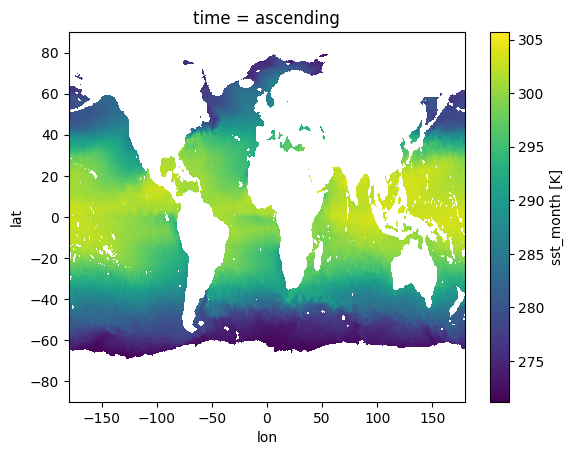

In [126]:
arr2.sst_month[0].plot()

In [112]:
x = sorted(glob.glob('../data/amsre/months/200206/*.npy'))

for idx, i in enumerate(x):
    j = np.load(i)
    if idx == 0:
        arr = j
    else:
        arr = np.concatenate((arr,j))
        
arr.shape

(29, 2, 720, 1440)

In [115]:
arr1 = np.nanmean(arr,0)
arr1.shape

/scratch/gypsum-gpu116/4321480/ipykernel_576954/3341281011.py:1: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(arr,0)


(2, 720, 1440)

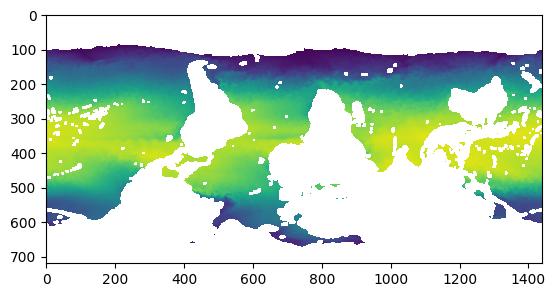

In [117]:
plt.imshow(arr1[1])

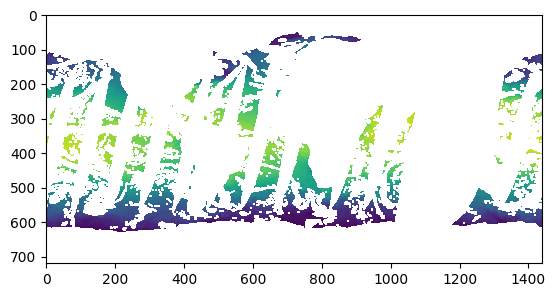

In [82]:
import matplotlib.pyplot as plt
import numpy as np 
plt.imshow(np.flipud(c.sea_surface_temperature[1]))

In [134]:
np.__version__

'1.22.3'

In [135]:
a = xr.open_dataset('../data/amsre/monthlies/200206.nc')
a

<xarray.Dataset>
Dimensions:    (time: 2, lat: 720, lon: 1440)
Coordinates:
  * lon        (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time       (time) object 'ascending' 'descending'
Data variables:
    sst_month  (time, lat, lon) float32 ...

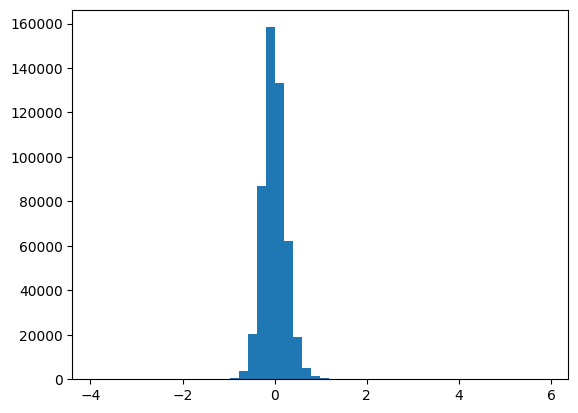

In [142]:
b = a.sst_month[0] - a.sst_month[1]
plt.hist(np.array(b).reshape(-1),bins=50);

In [145]:
a = glob.glob('../data/amsre/monthlies/2007*')
len(a)

12

In [191]:
2 + 3

5

In [18]:
import re
from collections import Counter as counter

s = re.findall('NSST',x[1])
t = counter(s)
t['NSST']

0

In [39]:
y

<xarray.Dataset>
Dimensions:   (lat: 2160, lon: 4320, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon       (lon) float32 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20100101_20100131.L3m.MO.SST...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   month
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics >...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        5107237
    data_minimum:                     -1.8000001
    data_maximum:                     39.84

12
12


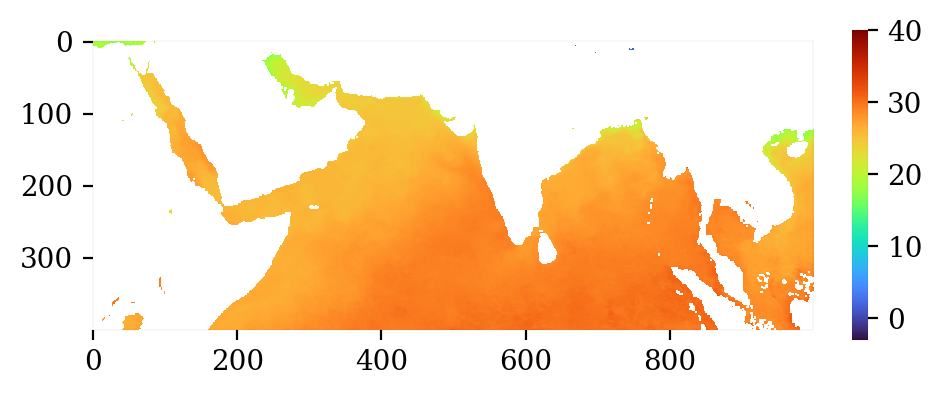

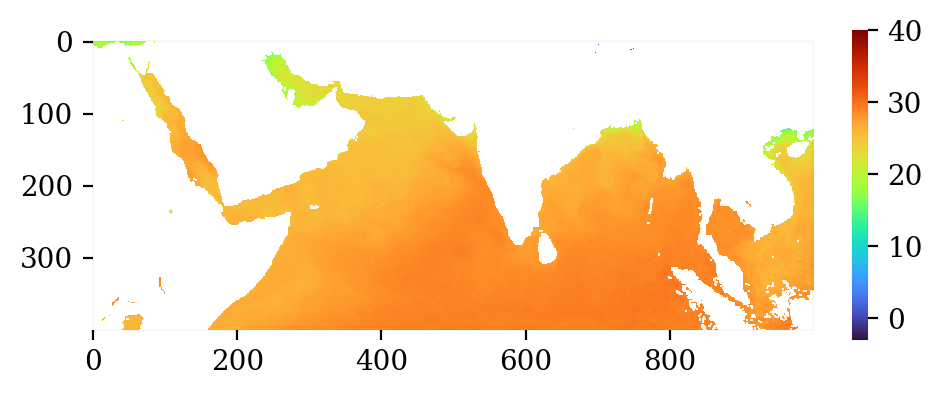

In [51]:
import glob
import xarray as xr

modis_day = sorted(glob.glob('../data/modis/2010/*.SST*.nc'))
print(len(modis_day))
y = xr.open_dataset(modis_day[0])
y1 = np.where(y.qual_sst==0,y.sst,np.nan)
plt.figure(figsize=(5,5))
plt.imshow(y1[700:1100,2500:3500],cmap='turbo',vmin=-3.1,vmax=40)
plt.colorbar(fraction=.02)


modis_night = sorted(glob.glob('../data/modis/2010/*NSST*.nc'))
print(len(modis_night))
z = xr.open_dataset(modis_night[0])
z1 = np.where(z.qual_sst==0,z.sst,np.nan)

plt.figure(figsize=(5,5))
plt.imshow(z1[700:1100,2500:3500],cmap='turbo',vmin=-3.1,vmax=40)
plt.colorbar(fraction=.02,)

In [37]:
print(y.time_coverage_start)
print(y.time_coverage_end)

print(z.time_coverage_start)
print(z.time_coverage_end)

2010-01-01T00:25:01.000Z
2010-02-01T02:09:59.000Z
2009-12-31T12:05:01.000Z
2010-01-31T15:00:00.000Z


In [32]:
print(x[0])
print(x[1])

../data/modis/2010/AQUA_MODIS.20100101_20100131.L3m.MO.SST.sst.9km.nc
../data/modis/2010/AQUA_MODIS.20100201_20100228.L3m.MO.SST.sst.9km.nc


In [80]:
class sst_retro:
    def __init__(self,year):
        self.year = year
        self.argo = sorted(glob.glob(f'../data/argo/argo_surfonly/ISAS20_ARGO_{self.year}*.nc'))
        self.amsre = sorted(glob.glob(f'../data/amsre/monthlies/{year_of_study}*'))
        self.modis_day = sorted(glob.glob(f'../data/modis/{year_of_study}/*.SST*.nc'))
        self.modis_night = sorted(glob.glob(f'../data/modis/{year_of_study}/*.NSST*.nc'))
instantiate = sst_retro(2010)

instantiate.argo

['../data/argo/argo_surfonly/ISAS20_ARGO_20100115_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20100215_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20100315_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20100415_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20100515_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20100615_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20100715_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20100815_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20100915_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20101015_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20101115_fld_TEMP.nc',
 '../data/argo/argo_surfonly/ISAS20_ARGO_20101215_fld_TEMP.nc']

In [78]:
data['2002']

'fun'

In [71]:
data = {}
data['2002'] = 'fun'

data

{'2002': 'fun'}

In [1]:
import glob
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

class sst_retro:
    def __init__(self,year):
        self.year = year
        self.argo = sorted(glob.glob(f'../data/argo/argo_surfonly/ISAS20_ARGO_{self.year}*.nc'))
        self.amsre = sorted(glob.glob(f'../data/amsre/monthlies/{self.year}*'))
        self.modis_day = sorted(glob.glob(f'../data/modis/{self.year}/*.SST*.nc'))
        self.modis_night = sorted(glob.glob(f'../data/modis/{self.year}/*.NSST*.nc'))
instantiate = sst_retro(2010)


year_of_study = 2010
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
mon_abbrev = [i[:3] for i in months]


In [144]:
mon_abbrev = [i[:3] for i in months]
mon_abbrev

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

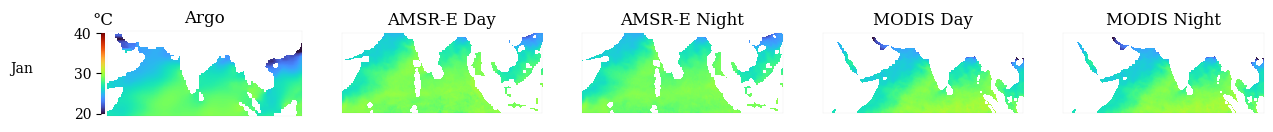

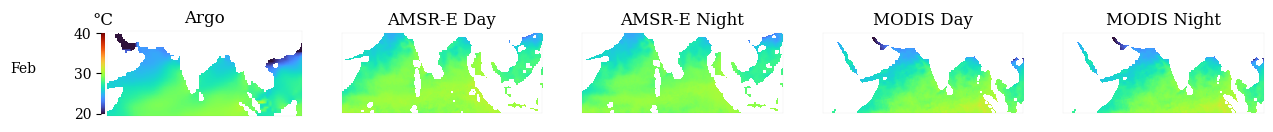

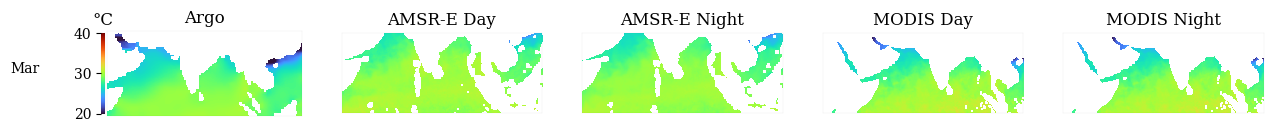

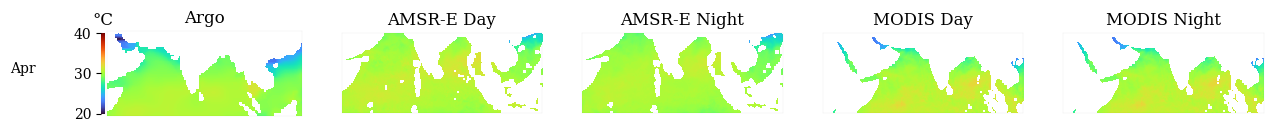

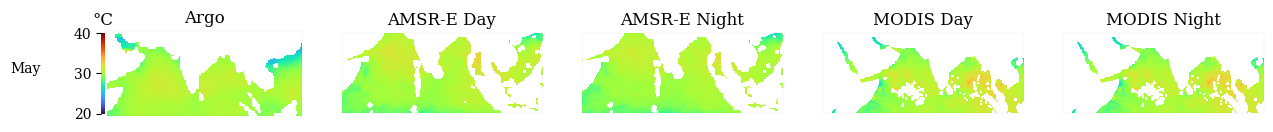

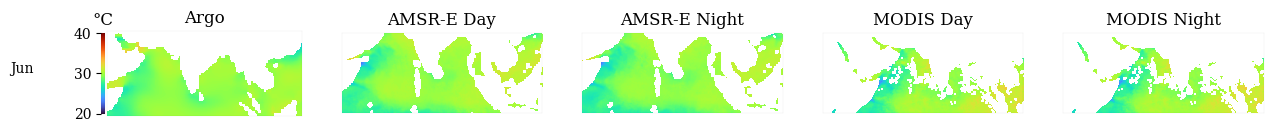

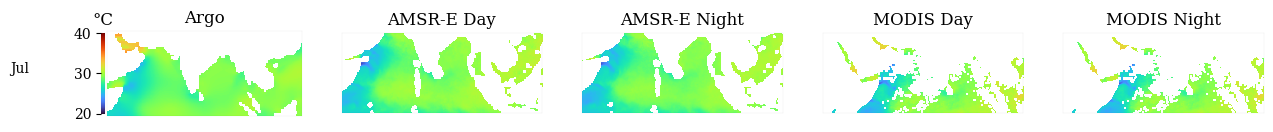

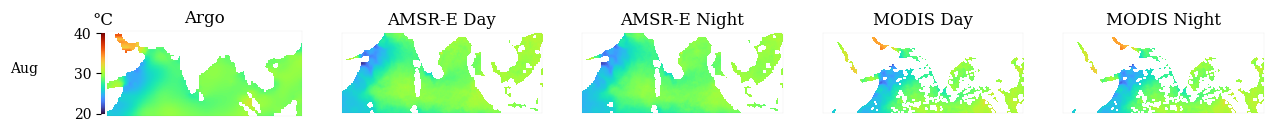

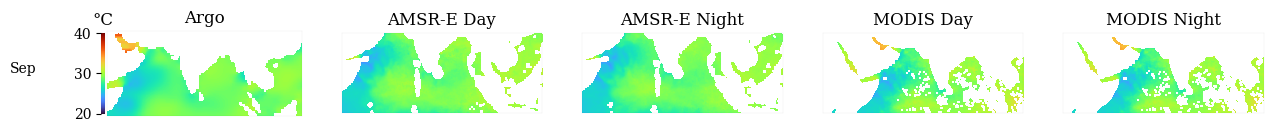

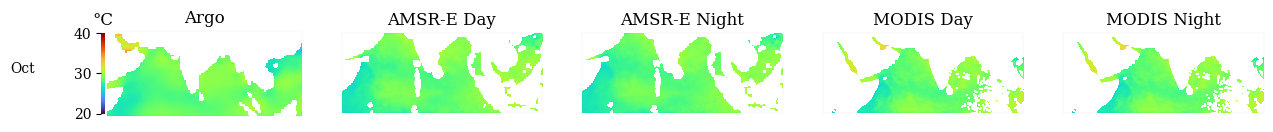

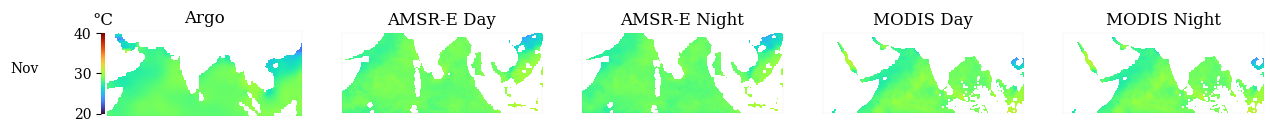

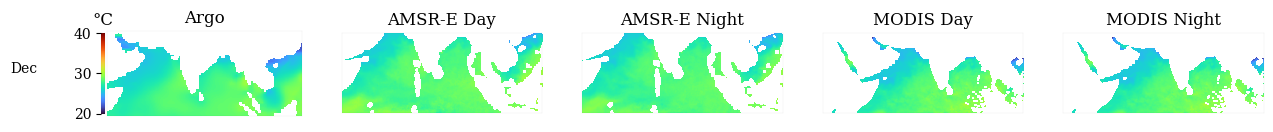

In [152]:
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['axes.linewidth'] = .02
plt.rcParams['figure.dpi'] = 100

for idx,i in enumerate(instantiate.argo):
    fig = plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(1,5,width_ratios=(.2,.2,.2,.2,.2),hspace=.2,wspace=.2)
    j = xr.open_dataset(i)
    fig.add_subplot(gs[0,0])
    plt.gca().set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.annotate(f'{mon_abbrev[idx]}',xy=(0,0),xytext=(-.5,0.5),xycoords='axes fraction')
    plt.imshow(np.flipud(j.TEMP[0][250:315,450:600]),cmap='turbo',vmin=20,vmax=40)
    cbr = plt.colorbar(fraction=.02,pad=.01,location='left',orientation='vertical')
    cbr.ax.set_title('°C');
    plt.title(f'Argo')
    
    fig.add_subplot(gs[0,1])
    plt.gca().set_aspect('equal')
    k = xr.open_dataset(instantiate.amsre[idx])
    plt.imshow(np.flipud(k.sst_month[0][330:450,900:1200]-273.15),cmap='turbo',vmin=20,vmax=40)
    plt.xticks([])
    plt.yticks([])
    plt.title('AMSR-E Day')
    fig.add_subplot(gs[0,2])
    plt.imshow(np.flipud(k.sst_month[1][330:450,900:1200]-273.15),cmap='turbo',vmin=20,vmax=40)
    plt.xticks([])
    plt.yticks([])
    plt.title('AMSR-E Night')
    
    fig.add_subplot(gs[0,3])
    plt.gca().set_aspect('equal')
    l = xr.open_dataset(instantiate.modis_day[idx])
    l1 = np.where(l.qual_sst==0,l.sst,np.nan)
    plt.imshow(l1[700:1100,2500:3500],cmap='turbo',vmin=20,vmax=40)
    plt.xticks([])
    plt.yticks([])
    plt.title('MODIS Day')
    
    fig.add_subplot(gs[0,4])
    plt.gca().set_aspect('equal')
    m = xr.open_dataset(instantiate.modis_night[idx])
    m1 = np.where(m.qual_sst==0,m.sst,np.nan)
    plt.imshow(l1[700:1100,2500:3500],cmap='turbo',vmin=20,vmax=40)
    plt.xticks([])
    plt.yticks([])
    plt.title('MODIS Night')
    


Text(-0.1, 0.5, 'hey')

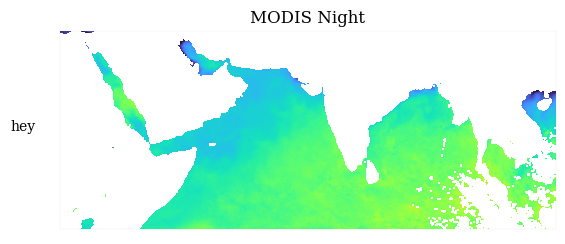

In [148]:
    plt.imshow(l1[700:1100,2500:3500],cmap='turbo',vmin=20,vmax=40)
    plt.xticks([])
    plt.yticks([])
    plt.title('MODIS Night')
    plt.annotate('hey',xy=(0,0),xytext=(-.1,0.5),xycoords='axes fraction')


In [197]:
a = xr.open_dataset('../data/AQUA_MODIS.20110201_20110228.L3m.MO.NSST.sst.4km.nc')
a

<xarray.Dataset>
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/59)
    product_name:                     AQUA_MODIS.20110201_20110228.L3m.MO.NSS...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   month
    ...                               ...
    publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    data_bins:                        19129987
    data_minimum:                     -1.785
    data_maximum:                     33.04

In [207]:
a.sst.shape[0] // 6, a.sst.shape[1] // 6

(720, 1440)

In [200]:
b = xr.open_dataset(amsre_2010[0])
b

<xarray.Dataset>
Dimensions:    (time: 2, lat: 720, lon: 1440)
Coordinates:
  * lon        (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time       (time) object 'ascending' 'descending'
Data variables:
    sst_month  (time, lat, lon) float32 ...

In [201]:
b.sst_month.shape

(2, 720, 1440)

In [208]:
c = xr.open_dataset(argo_2010[0])
c

<xarray.Dataset>
Dimensions:      (longitude: 720, latitude: 545, time: 1)
Coordinates:
  * longitude    (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude     (latitude) float32 -77.01 -76.9 -76.78 ... 89.49 89.69 89.9
    depth        float32 ...
  * time         (time) datetime64[ns] 2010-01-15
Data variables:
    TEMP         (time, latitude, longitude) float32 ...
    TEMP_ERR     (time, latitude, longitude) float32 ...
    TEMP_PCTVAR  (time, latitude, longitude) float32 ...
Attributes: (12/20)
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20210706T131544L : Creation
    institution:            LOPS/IFREMER/IUEM
    project_name:           ISASLOPS
    analysis_name:          ISAS20_ARGO_
    ...                     ...
    start_date:             2010-01-15
    stop_date:              2010-01-15
    creation_date:          20210706T131544L
    reference_date:         1950-01-01T00:00:00Z
    references:             Gaillard et al., JCLIM 2016, Doi:10.1175/JCLI-D-1...
    comment:                V8.0 T and S fields

In [209]:
c.TEMP.shape

(1, 545, 720)

In [215]:
d = xr.open_dataset('../data/AQUA_MODIS.20110201_20110228.L3m.MO.NSST.sst.9km.nc')
d.sst.shape[0]//3, d.sst.shape[1]//3

(720, 1440)

In [217]:
import os
for i in range(2003,2012):
    os.mkdir(f'../data/modis/{i}')
    print(i)

2003
2004
2005
2006
2007
2008
2009
2010
2011


In [218]:
a = xr.open_dataset('../data/modis/2008/AQUA_MODIS.20080101_20080131.L3m.MO.NSST.sst.9km.nc')
a

<xarray.Dataset>
Dimensions:   (lat: 2160, lon: 4320, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon       (lon) float32 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/59)
    product_name:                     AQUA_MODIS.20080101_20080131.L3m.MO.NSS...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   month
    ...                               ...
    publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    data_bins:                        4810985
    data_minimum:                     -1.7099999
    data_maximum:                     32.679245

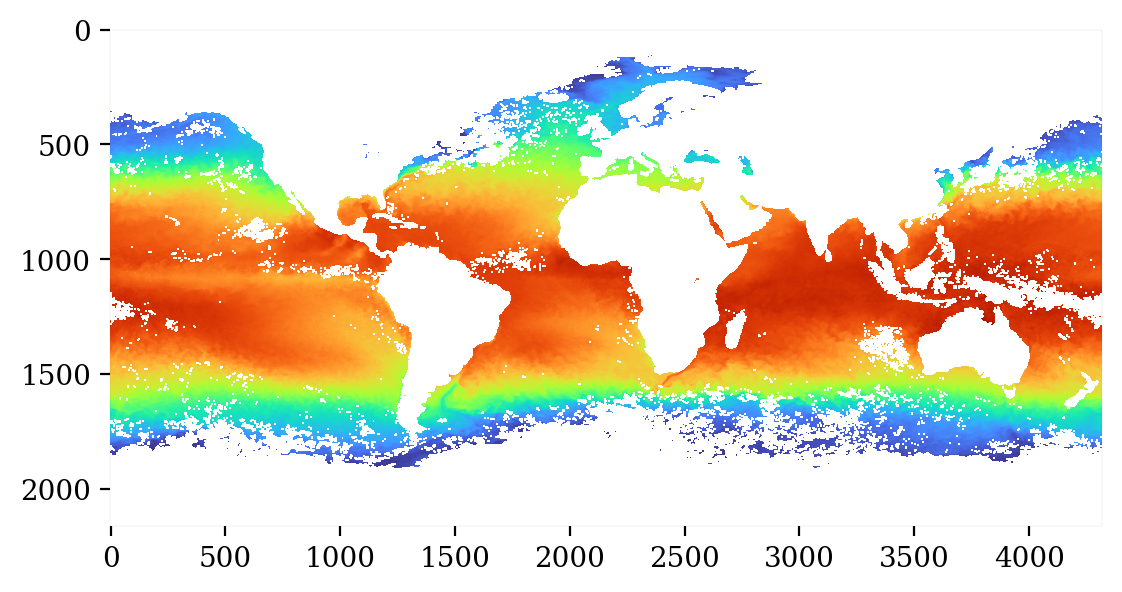

In [222]:
plt.imshow(np.where(a.qual_sst==0,a.sst,np.nan),cmap='turbo')

In [5]:
instantiate.amsre[0]

'../data/amsre/monthlies/201001.nc'

In [6]:
instantiate.modis_day[0]

'../data/modis/2010/AQUA_MODIS.20100101_20100131.L3m.MO.SST.sst.9km.nc'

In [7]:
a = xr.open_dataset(instantiate.amsre[0])
b = xr.open_dataset(instantiate.modis_day[0])

a

<xarray.Dataset>
Dimensions:    (time: 2, lat: 720, lon: 1440)
Coordinates:
  * lon        (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time       (time) object 'ascending' 'descending'
Data variables:
    sst_month  (time, lat, lon) float32 ...

In [8]:
a.sst_month.shape

(2, 720, 1440)

In [10]:
b.sst.shape

(2160, 4320)